FACE MASK DETECTION

        1)dataset=images with and without masks
            2)train the model
                    3)use detection to test - detect mask

In [7]:
#import lib
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [8]:
#load data
data=np.load('data.npy')
target=np.load('new_target.npy')

In [9]:
#cnn
cnn = Sequential([
    Conv2D(200, (3,3), activation='relu', input_shape=data.shape[1:]),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [10]:
#split data
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [11]:
#checkpoint=model
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=False,mode='auto')

In [12]:
#model fit
history = cnn.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 0.7148 - acc: 0.5761

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


30/30 [==============================] - 25s 824ms/step - loss: 0.7148 - acc: 0.5761 - val_loss: 0.6373 - val_acc: 0.6709
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 0.6707 - acc: 0.5867

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


30/30 [==============================] - 26s 862ms/step - loss: 0.6707 - acc: 0.5867 - val_loss: 0.6597 - val_acc: 0.5570
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.5751 - acc: 0.6892

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


30/30 [==============================] - 25s 821ms/step - loss: 0.5751 - acc: 0.6892 - val_loss: 0.5467 - val_acc: 0.6498
Epoch 4/20
30/30 [==============================] - ETA: 0s - loss: 0.4228 - acc: 0.8150

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


30/30 [==============================] - 24s 802ms/step - loss: 0.4228 - acc: 0.8150 - val_loss: 0.3887 - val_acc: 0.8397
Epoch 5/20
30/30 [==============================] - ETA: 0s - loss: 0.2982 - acc: 0.8911

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


30/30 [==============================] - 25s 832ms/step - loss: 0.2982 - acc: 0.8911 - val_loss: 0.2903 - val_acc: 0.8987
Epoch 6/20
30/30 [==============================] - ETA: 0s - loss: 0.2273 - acc: 0.9101

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


30/30 [==============================] - 25s 837ms/step - loss: 0.2273 - acc: 0.9101 - val_loss: 0.2435 - val_acc: 0.9072
Epoch 7/20
30/30 [==============================] - ETA: 0s - loss: 0.2062 - acc: 0.9239

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


30/30 [==============================] - 26s 852ms/step - loss: 0.2062 - acc: 0.9239 - val_loss: 0.2589 - val_acc: 0.8987
Epoch 8/20
30/30 [==============================] - ETA: 0s - loss: 0.1404 - acc: 0.9471

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


30/30 [==============================] - 25s 831ms/step - loss: 0.1404 - acc: 0.9471 - val_loss: 0.2817 - val_acc: 0.8945
Epoch 9/20
30/30 [==============================] - ETA: 0s - loss: 0.1326 - acc: 0.9461

INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


30/30 [==============================] - 25s 829ms/step - loss: 0.1326 - acc: 0.9461 - val_loss: 0.2375 - val_acc: 0.9072
Epoch 10/20
30/30 [==============================] - ETA: 0s - loss: 0.0981 - acc: 0.9672

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


30/30 [==============================] - 25s 849ms/step - loss: 0.0981 - acc: 0.9672 - val_loss: 0.2908 - val_acc: 0.8903
Epoch 11/20
30/30 [==============================] - ETA: 0s - loss: 0.0689 - acc: 0.9799

INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


30/30 [==============================] - 26s 872ms/step - loss: 0.0689 - acc: 0.9799 - val_loss: 0.2923 - val_acc: 0.9114
Epoch 12/20
30/30 [==============================] - ETA: 0s - loss: 0.0705 - acc: 0.9736

INFO:tensorflow:Assets written to: model-012.model\assets


INFO:tensorflow:Assets written to: model-012.model\assets


30/30 [==============================] - 26s 865ms/step - loss: 0.0705 - acc: 0.9736 - val_loss: 0.2957 - val_acc: 0.9030
Epoch 13/20
30/30 [==============================] - ETA: 0s - loss: 0.0679 - acc: 0.9757

INFO:tensorflow:Assets written to: model-013.model\assets


INFO:tensorflow:Assets written to: model-013.model\assets


30/30 [==============================] - 27s 922ms/step - loss: 0.0679 - acc: 0.9757 - val_loss: 0.3132 - val_acc: 0.9156
Epoch 14/20
30/30 [==============================] - ETA: 0s - loss: 0.0440 - acc: 0.9810

INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


30/30 [==============================] - 30s 1s/step - loss: 0.0440 - acc: 0.9810 - val_loss: 0.3465 - val_acc: 0.8945
Epoch 15/20
30/30 [==============================] - ETA: 0s - loss: 0.0374 - acc: 0.9905

INFO:tensorflow:Assets written to: model-015.model\assets


INFO:tensorflow:Assets written to: model-015.model\assets


30/30 [==============================] - 31s 1s/step - loss: 0.0374 - acc: 0.9905 - val_loss: 0.4018 - val_acc: 0.8861
Epoch 16/20
30/30 [==============================] - ETA: 0s - loss: 0.0311 - acc: 0.9884

INFO:tensorflow:Assets written to: model-016.model\assets


INFO:tensorflow:Assets written to: model-016.model\assets


30/30 [==============================] - 27s 904ms/step - loss: 0.0311 - acc: 0.9884 - val_loss: 0.4149 - val_acc: 0.8819
Epoch 17/20
30/30 [==============================] - ETA: 0s - loss: 0.0216 - acc: 0.9947

INFO:tensorflow:Assets written to: model-017.model\assets


INFO:tensorflow:Assets written to: model-017.model\assets


30/30 [==============================] - 26s 854ms/step - loss: 0.0216 - acc: 0.9947 - val_loss: 0.3545 - val_acc: 0.9241
Epoch 18/20
30/30 [==============================] - ETA: 0s - loss: 0.0340 - acc: 0.9873

INFO:tensorflow:Assets written to: model-018.model\assets


INFO:tensorflow:Assets written to: model-018.model\assets


30/30 [==============================] - 28s 931ms/step - loss: 0.0340 - acc: 0.9873 - val_loss: 0.4411 - val_acc: 0.8734
Epoch 19/20
30/30 [==============================] - ETA: 0s - loss: 0.0488 - acc: 0.9852

INFO:tensorflow:Assets written to: model-019.model\assets


INFO:tensorflow:Assets written to: model-019.model\assets


30/30 [==============================] - 28s 944ms/step - loss: 0.0488 - acc: 0.9852 - val_loss: 0.3271 - val_acc: 0.9114
Epoch 20/20
30/30 [==============================] - ETA: 0s - loss: 0.0365 - acc: 0.9915

INFO:tensorflow:Assets written to: model-020.model\assets


INFO:tensorflow:Assets written to: model-020.model\assets


30/30 [==============================] - 26s 882ms/step - loss: 0.0365 - acc: 0.9915 - val_loss: 0.3341 - val_acc: 0.9030


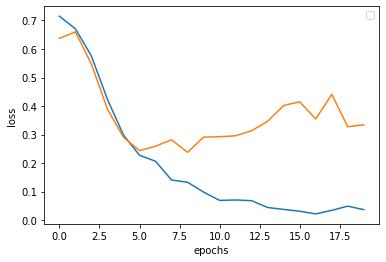

In [13]:
#visualise loss and acc
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

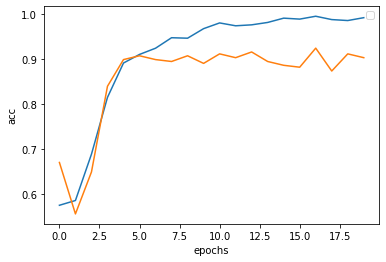

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [16]:
#evaluate model
eval=cnn.evaluate(test_data,test_target)
print(eval)

5/5 [==============================] - 1s 161ms/step - loss: 0.2510 - acc: 0.9470
[0.25095102190971375, 0.9469696879386902]
